# Analyze Ice Caps

This notebook analyzes the 10 largest ice caps in regions 3, 4, 5, 6, 7, 8, 9, 10, and 17

In [6]:
import os
import os.path as op
import sys
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio as rio
from rasterio.plot import plotting_extent
import earthpy.plot as ep

# set working dir
HOME = op.join(op.expanduser("~"))
os.chdir(os.path.join(HOME, "git/wgms-glacier-project"))

# Set up path to load scripts
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import scripts.wgms_scripts as ws

In [2]:
# Open region 7 largest ice caps file
region = 7
region_fn = "data/glims/processed/ice-caps/largest/largest-ice-caps-region_" + str(region) + ".shp"
ten_lg_region_df = gpd.read_file(region_fn)

In [3]:
ten_lg_region_df

,id,area,geometry
0,7,8402.703720,"POLYGON ((18.914782 78.469039, 18.910191 78.46..."
1,708,8077.403592,"POLYGON ((24.946811 79.36035200000001, 24.9392..."
2,8,5410.102716,"POLYGON ((13.66026 78.255189, 13.660433 78.255..."
3,431,4451.165085,"POLYGON ((18.185957 77.56537, 18.185853 77.565..."
4,706,2372.805757,"POLYGON ((19.215861 79.764661, 19.215788 79.76..."
5,215,1160.308733,"POLYGON ((23.382094 77.464433, 23.422874 77.45..."
6,638,646.149091,"POLYGON ((33.482192 80.22808499999999, 33.4878..."
7,871,511.149775,"POLYGON ((21.936172 78.491522, 21.963917 78.49..."
8,200,226.928046,"POLYGON ((22.046245 77.567789, 22.04168 77.568..."
9,762,161.182697,"POLYGON ((20.493904 79.52167, 20.497456 79.520..."


In [7]:
# Open natural earth basemap TIF file
ne_fp = 'data/natural-earth/NE1_50m_SR/NE1_50M_SR.tif'
with rio.open(ne_fp) as ne_src:
    # Convert / read the data into a numpy array:
    ne_raster = ne_src.read()
    ne_src_extent = plotting_extent(ne_src)
    bounds = ne_src.bounds

In [8]:
# Open glacier regions
glacier_regions_fp = "data/gtn-g-glacier-regions/cleaned/GTN-G_glacier_regions_201707_cleaned.shp"
glacier_regions = gpd.read_file(glacier_regions_fp)

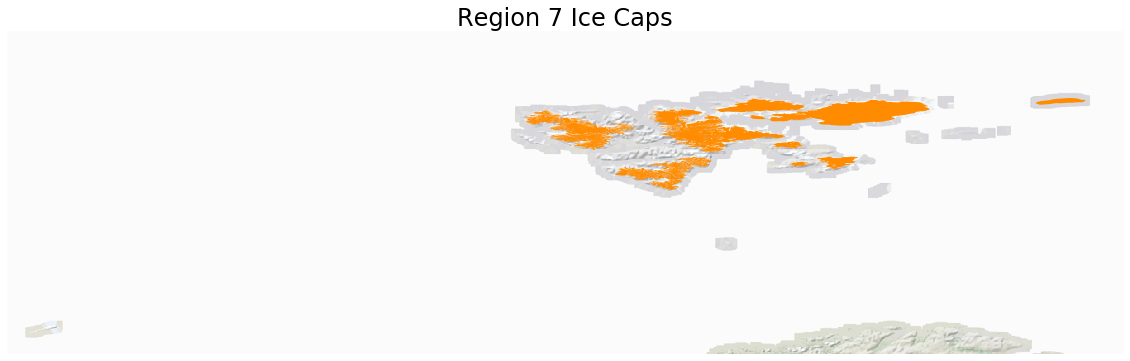

In [9]:
# Set up plot space
fig, ax = plt.subplots(figsize=(20, 20))
minx, miny, maxx, maxy = glacier_regions.loc[6:6].total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# Plot natural earth basemap for Region 1
ep.plot_rgb(ne_raster,
            rgb=[0, 1, 2],
            extent=ne_src_extent,
            ax=ax)

# Plot 1st largest and the title and legend
ten_lg_region_df.plot(ax=ax, color="darkorange")
ax.set_title('Region 7 Ice Caps', fontsize=24)
ax.set_axis_off()